#Projeto Análise Exploratória de Genomas de Bacteriófagos

O objeto ivgeral o desse projeto é realizar uma análise exploratória de dados genômicos de bacteriófagoo, e para analise será utilizada bibliotecas básicas de Pytohn, como Pandon, para processar e visulalizar os genomasálise.

#Possíveis bancos

°National Center for Biotechnology Information (NCBI): fonte de dados biológicos e genômicos, como genomas completos, sequÊncias de genes, proteínas e metadados associados.

°PhagesDB: banco de dados especializado em bacteriófagos, com sequências de fagos e informações sobre seus hospedeiros.

°European Bioinformatics Institute (EBI): acesso a várias bases de dados genômicos, como o European Nucleotide Archive (ENA), para download de sequências biológicas.

#Selecionado:

°EBI: acesso ao ENA, de onde o arquivo a ser estudado foi retirado.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re


#Entendendo a estrutura do arquivo

ºTer uma compreensão clara das informações que o arquivo fornece, com isso, pode se decidir quais dados mais relevantes para análise.

In [6]:
#Entender a estrutura do arquivo
# Carregar o arquivo TSV 
bacteriophages_df = pd.read_csv("C:\\Users\\amand\\Downloads\\ena_genome_assembly_20241023-1743.tsv", sep='\t')

# Exibir as primeiras linhas
print(bacteriophages_df.head())
print(bacteriophages_df.columns)#verificar os nomes das colunas

         accession                                       description
0  GCA_022604735.1  ASM2260473v1 assembly for Bacillus phage vB_BcgM
1  GCA_017654265.1  ASM1765426v1 assembly for Escherichia phage MN03
2  GCA_017654275.1  ASM1765427v1 assembly for Escherichia phage MN04
3  GCA_017654235.1  ASM1765423v1 assembly for Escherichia phage MN01
4  GCA_017654285.1  ASM1765428v1 assembly for Escherichia phage MN05
Index(['accession', 'description'], dtype='object')


#Depois de carregado o arquivo, foi verifacada as informações do arquivo.

Primeiras linhas após extração:
         accession bacteriophage
0  GCA_022604735.1       vB_BcgM
1  GCA_017654265.1          MN03
2  GCA_017654275.1          MN04
3  GCA_017654235.1          MN01
4  GCA_017654285.1          MN05
Número de valores nulos na coluna 'organism': 0
Número de montagens por bacteriófago:
bacteriophage
156             2
163             1
9181            1
9183            1
9184            1
               ..
vB_SenS         1
vB_SenTO17      1
vB_SsoM_113     1
vB_SsoM_JK08    1
vB_XooS_NR08    1
Name: accession, Length: 306, dtype: int64
Montagens ordenadas por bacteriófagos:
bacteriophage
sp              79
vB_EcoS         47
PG              40
S               36
fPS             18
                ..
RHph_N2          1
RHph_N1_15       1
RHph_N1_10       1
RHph_N17         1
vB_XooS_NR08     1
Name: accession, Length: 306, dtype: int64


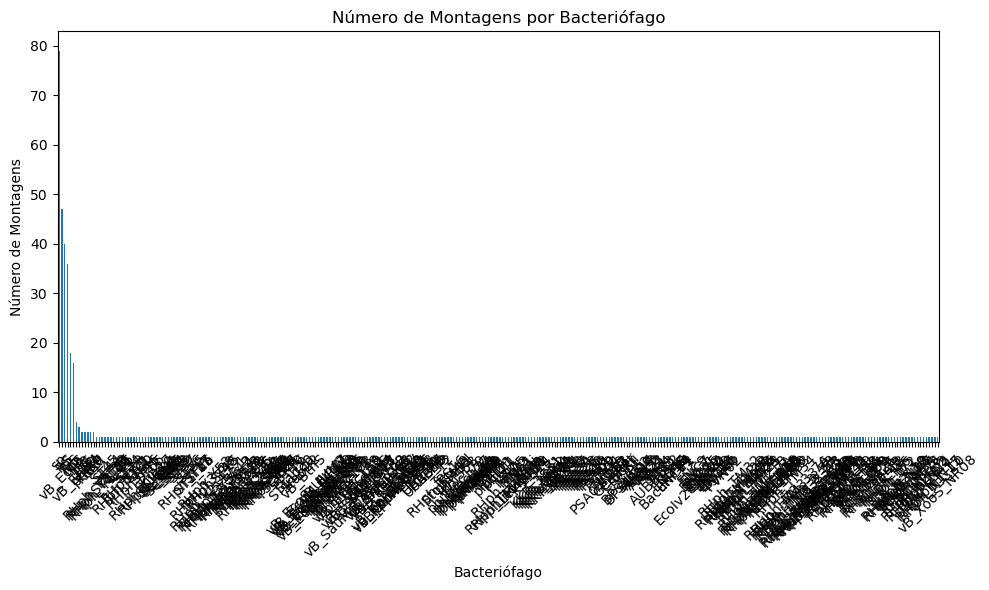

In [23]:
# Extrair o nome do bacteriófago
bacteriophages_df['bacteriophage'] = bacteriophages_df['description'].str.extract(r'phage (\w+)')

# Verificar se a extração foi bem-sucedida e exibir as primeiras linhas
print("Primeiras linhas após extração:")
print(bacteriophages_df[['accession', 'bacteriophage']].head())

# Verificar quantos valores nulos existem na coluna 'organism' (falhas na extração)
nulos = bacteriophages_df['bacteriophage'].isna().sum()
print(f"Número de valores nulos na coluna 'organism': {nulos}")

# Se houver valores nulos, remover essas linhas
if nulos > 0:
    bacteriophages_df = bacteriophages_df.dropna(subset=['bacteriophage'])
    print(f"DataFrame após remover valores nulos: {bacteriophages_df.shape[0]} linhas restantes")

# Contar o número de montagens por bacteriófago
montagens_por_bacteriófago = bacteriophages_df.groupby('bacteriophage')['accession'].count()

# Exibir os resultados
print("Número de montagens por bacteriófago:")
print(montagens_por_bacteriófago)

# Ordenar por número de montagens de forma decrescente
montagens_por_bacteriófago_sorted = montagens_por_bacteriófago.sort_values(ascending=False)

# Exibir os resultados ordenados
print("Montagens ordenadas por bacteriófagos:")
print(montagens_por_bacteriófago_sorted)

# Verificar se há dados para plotar
if montagens_por_bacteriófago_sorted.empty:
    print("Nenhum dado encontrado para plotagem.")
else:
    # Plotar o número de montagens por bacteriófago
    montagens_por_bacteriófago_sorted.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Bacteriófago')
    plt.ylabel('Número de Montagens')
    plt.title('Número de Montagens por Bacteriófago')
    plt.xticks(rotation=45)  # Rotacionar os nomes para melhorar legibilidade
    plt.tight_layout()  # Ajustar layout para que as etiquetas não sejam cortadas
    plt.show()

         accession                                       description  \
0  GCA_022604735.1  ASM2260473v1 assembly for Bacillus phage vB_BcgM   
1  GCA_017654265.1  ASM1765426v1 assembly for Escherichia phage MN03   
2  GCA_017654275.1  ASM1765427v1 assembly for Escherichia phage MN04   
3  GCA_017654235.1  ASM1765423v1 assembly for Escherichia phage MN01   
4  GCA_017654285.1  ASM1765428v1 assembly for Escherichia phage MN05   

  bacteriophage  
0       vB_BcgM  
1          MN03  
2          MN04  
3          MN01  
4          MN05  
Número de montagens por bacteriófago:
bacteriophage
156             2
163             1
9181            1
9183            1
9184            1
               ..
vB_SenS         1
vB_SenTO17      1
vB_SsoM_113     1
vB_SsoM_JK08    1
vB_XooS_NR08    1
Name: accession, Length: 306, dtype: int64
Bacteriófagos identificados:
['vB_BcgM' 'MN03' 'MN04' 'MN01' 'MN05' 'vB_KpnM_05F' 'vB_EcoM_UP17'
 'vB_SsoM_113' 'vB_KpnS_2811' 'vB_SsoM_JK08' 'vB_KpnM_311F'
 'vB_SauM

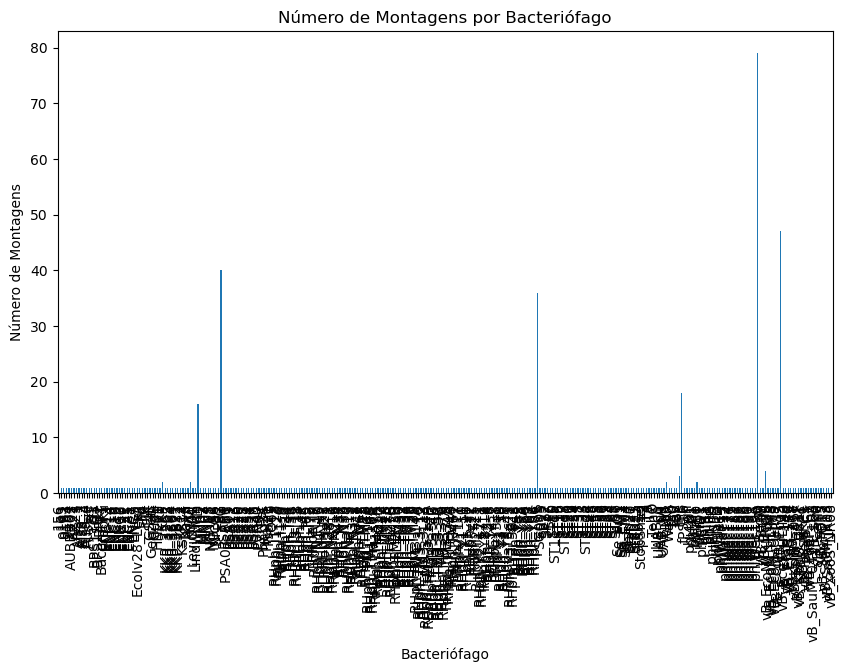

In [30]:
# Verificar se a extração foi bem-sucedida
print(bacteriophages_df[['accession', 'description', 'bacteriophage']].head())

# Contar o número de montagens por bacteriófago
montagens_por_bacteriófago = bacteriophages_df.groupby('bacteriophage')['accession'].count()

# Exibir os resultados
print("Número de montagens por bacteriófago:")
print(montagens_por_bacteriófago)

# Listar os diferentes bacteriófagos identificados
bacteriophagos_unicos = bacteriophages_df['bacteriophage'].dropna().unique()
print("Bacteriófagos identificados:")
print(bacteriophagos_unicos)

# Histograma da contagem de montagens por bacteriófago
plt.figure(figsize=(10, 6))
montagens_por_bacteriófago.plot(kind='bar')
plt.xlabel('Bacteriófago')
plt.ylabel('Número de Montagens')
plt.title('Número de Montagens por Bacteriófago')
plt.show()

#Observando os resultados obtidos acima é possivel fazer a identificação dos bacteriófagos, onde a coluna 'bacteriophage' foi criada extraindo o nome dos fagos da coluna 'description'. Foram identificados 306 fagos diferentes a partir dos dados.
#Também foi possivel contar o número de montagens para cada fago, essas informações foram obtidas na variável 'montagens_por_bacteriófago', e aparentemente há uma grande diversidade no número de montagens por fagos.


#Após os resultados, alguns pontos a serem entendidos:

°Sobre a diversidade de bacteriófagos: 
    Quais bacteriófagos são mais prevalentes nos dados ?
    
°Sobre análise de padrões nos nomes dos bacteriófagos: 
    Existem padrões ou nomenclaturas comuns entre os bacteriófagos?
    
°Sobre a montagens com nomes numéricos:
    O que significam os nomes numéricos como 156, 163, 9181 ?

#Alguns possiveis próximos passos para a análise:

°Investigação detalhada de certos bacteriófagos

°Correlação com outras informações

°Análise temporal

°Agrupamento de bacteriófagos por nomenclatura

#Opção por seguir pela ánalise de 'Agrupamento de bacteriófagos por nomenclatura'

°O objetivo específico então foi saber quantos bacteriófagos que começam com "vB_" o arquivo possui.

*Breve colocação sobre algumas convenções que a nomeclatura utilizada para os bacteriófagos segue ... 

°Está atrelada, em muitos casos, a informações sobre o bacteriófago, como por exemplo, o tipo de hospedeiro, e a estrutura do proprio bacteriófago. 

°No arquivo fonte algumas nomenclaturas foram observadas:

    °vB, phi, Alsa, Se, dentre outros

    EX: "vB_PaeM", vB_ indica um "viral bacteriophage" de Pseudomonas aeruginosa (Pae) da família Myoviridae (M)

Categoria
Others       434
vB Group      78
phi Group     28
Numeric        6
Name: count, dtype: int64


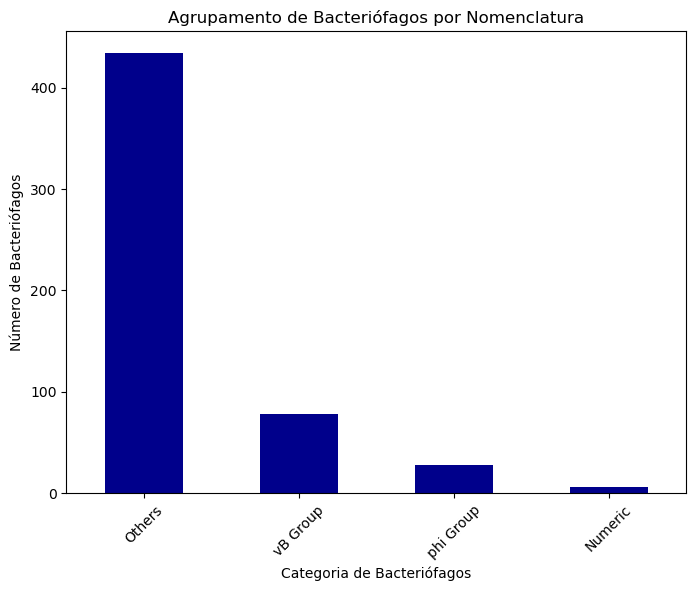

In [28]:
# Função para categorizar bacteriófagos com base em padrões de nomenclatura
def categorizar_bacteriofagos(nome):
    if re.match(r'^vB_', nome):  # Bacteriófagos que começam com 'vB_'
        return 'vB Group'
    elif re.match(r'^phi', nome):  # Bacteriófagos que começam com 'phi'
        return 'phi Group'
    elif re.match(r'^\d+$', nome):  # Apenas números
        return 'Numeric'
    else:
        return 'Others'

# Aplicar a função de categorização à coluna 'organism'
bacteriophages_df['Categoria'] = bacteriophages_df['bacteriophage'].apply(categorizar_bacteriofagos)

# Contar o número de bacteriófagos em cada categoria
contagem_categorias = bacteriophages_df['Categoria'].value_counts()

# Exibir a contagem de cada categoria
print(contagem_categorias)

# Plotar a distribuição dos grupos
plt.figure(figsize=(8, 6))
contagem_categorias.plot(kind='bar', color='darkblue')
plt.xlabel('Categoria de Bacteriófagos')
plt.ylabel('Número de Bacteriófagos')
plt.title('Agrupamento de Bacteriófagos por Nomenclatura')
plt.xticks(rotation=45)
plt.show()

#A partir da escolha pelo agrupamento dos bacteriófagos por nomenclatura, principalmente saber quantos bacteriófagos começam com "vB_", foi concluido que o grupo contem 78 representantes, correspondendo ao segundo grupo com mais bacteriófagos.